In [34]:
#Importiere Libraries
import pandas as pd
import numpy as np
import matplotlib as plt
from datetime import datetime as dt
import os


#Initmessage
print ("starting Tensorflow") 

#lade von CSV
data_frame_investigated = pd.read_csv("Data/crypto-markets.csv", sep=",",encoding='utf-8' )


print("data collected")


data_frame_investigated.head()

#Neue Modellgewichte errechnen?: Standard = True
Y_FIT_MODELL = False

starting Tensorflow
data collected


In [35]:

# Daten abgrenzen
def get_weekDay(currentDate):#Wochentag ermitteln 0 Montag - > 6 Sonntag
    currentDate = dt.strptime( currentDate, '%Y-%m-%d')
    return currentDate.weekday()
def get_monthDay(currentDate):
    currentDate = dt.strptime( currentDate, '%Y-%m-%d')
    return currentDate.day

#Wochentag in dataframe
data_frame_investigated['weekday'] = data_frame_investigated['date'].apply(get_weekDay)
#monatstag [0-31] in dataframe
data_frame_investigated['day'] = data_frame_investigated['date'].apply(get_monthDay)

#Liste der slugs machen
#make a  list of the different coins
different_coins = data_frame_investigated.slug.unique()
print(different_coins)


data_frame_investigated.head()

['bitcoin' 'ethereum' 'ripple' ... 'sisa' 'entcash' 'numuscash']


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,weekday,day
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88,6,28
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49,0,29
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88,1,30
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17,2,1
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32,3,2


In [36]:
#mache Date zu Datetime objekt
data_frame_investigated['date']=pd.to_datetime(
    data_frame_investigated['date'],yearfirst=True
)

In [37]:
#eliminiere redundante Attribute
REDUNDANT_ATTRIBUTES=['symbol','name'] 
data_frame_investigated.drop(REDUNDANT_ATTRIBUTES,axis=1,inplace=True) #loeschen





In [38]:
data_frame_investigated.head(5)

,slug,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,weekday,day
0,bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88,6,28
1,bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49,0,29
2,bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88,1,30
3,bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17,2,1
4,bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32,3,2


In [39]:
#neuen df den ich nach dem ermittelten coin auslege
df_to_tensorflow = data_frame_investigated
 #resette den index damit ich ihn ohne probleme unten wieder setten kann




#index stten und nach slug gruppieren, dabei Features des Indexes loeschen (inplace)
df_to_tensorflow.set_index(['slug','date'], inplace = True)
df_to_tensorflow.head()




ranknow    open    high     low   close  volume  \
slug    date                                                          
bitcoin 2013-04-28        1  135.30  135.98  132.10  134.21     0.0   
        2013-04-29        1  134.44  147.49  134.00  144.54     0.0   
        2013-04-30        1  144.00  146.93  134.05  139.00     0.0   
        2013-05-01        1  139.00  139.89  107.72  116.99     0.0   
        2013-05-02        1  116.38  125.60   92.28  105.21     0.0   

                          market  close_ratio  spread  weekday  day  
slug    date                                                         
bitcoin 2013-04-28  1.500520e+09       0.5438    3.88        6   28  
        2013-04-29  1.491160e+09       0.7813   13.49        0   29  
        2013-04-30  1.597780e+09       0.3843   12.88        1   30  
        2013-05-01  1.542820e+09       0.2882   32.17        2    1  
        2013-05-02  1.292190e+09       0.3881   33.32        3    2

In [40]:
#Unstacken
df_to_tensorflow = df_to_tensorflow.unstack(level=0) #nur den slug hochholen
df_to_tensorflow.head()

ranknow                                                           \
slug        0chain  0x 0xbtc 0xcert 1337coin 1world 2give 300-token 42-coin   
date                                                                          
2013-04-28     NaN NaN   NaN    NaN      NaN    NaN   NaN       NaN     NaN   
2013-04-29     NaN NaN   NaN    NaN      NaN    NaN   NaN       NaN     NaN   
2013-04-30     NaN NaN   NaN    NaN      NaN    NaN   NaN       NaN     NaN   
2013-05-01     NaN NaN   NaN    NaN      NaN    NaN   NaN       NaN     NaN   
2013-05-02     NaN NaN   NaN    NaN      NaN    NaN   NaN       NaN     NaN   

                     ...     day                                               \
slug       808coin   ...   zilla zilliqa zinc zip zippie zoin zozocoin zrcoin   
date                 ...                                                        
2013-04-28     NaN   ...     NaN     NaN  NaN NaN    NaN  NaN      NaN    NaN   
2013-04-29     NaN   ...     NaN     NaN  NaN NaN    NaN  NaN      NaN    NaN   
2013-04-30     NaN   ...     NaN     NaN  NaN NaN    NaN  NaN      NaN    NaN   
2013-05-01     NaN   ...     NaN     NaN  NaN NaN    NaN  NaN      NaN    NaN   
2013-05-02     NaN   ...     NaN     NaN  NaN NaN    NaN  NaN      NaN    NaN   

                            
slug       zsecoin zurcoin  
date                        
2013-04-28     NaN     NaN  
2013-04-29     NaN     NaN  
2013-04-30     NaN     NaN  
2013-05-01     NaN     NaN  
2013-05-02     NaN     NaN  

[5 rows x 17952 columns]

In [41]:
df_to_tensorflow.columns = df_to_tensorflow.columns.swaplevel(0, 1)
df_to_tensorflow.sortlevel(0, axis=1, inplace=True)
df_to_tensorflow.head()

c:\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  


slug       0chain                                                             \
            close close_ratio day high low market open ranknow spread volume   
date                                                                           
2013-04-28    NaN         NaN NaN  NaN NaN    NaN  NaN     NaN    NaN    NaN   
2013-04-29    NaN         NaN NaN  NaN NaN    NaN  NaN     NaN    NaN    NaN   
2013-04-30    NaN         NaN NaN  NaN NaN    NaN  NaN     NaN    NaN    NaN   
2013-05-01    NaN         NaN NaN  NaN NaN    NaN  NaN     NaN    NaN    NaN   
2013-05-02    NaN         NaN NaN  NaN NaN    NaN  NaN     NaN    NaN    NaN   

slug         ...       zurcoin                                                 \
             ...   close_ratio day high low market open ranknow spread volume   
date         ...                                                                
2013-04-28   ...           NaN NaN  NaN NaN    NaN  NaN     NaN    NaN    NaN   
2013-04-29   ...           NaN NaN  NaN NaN    NaN  NaN     NaN    NaN    NaN   
2013-04-30   ...           NaN NaN  NaN NaN    NaN  NaN     NaN    NaN    NaN   
2013-05-01   ...           NaN NaN  NaN NaN    NaN  NaN     NaN    NaN    NaN   
2013-05-02   ...           NaN NaN  NaN NaN    NaN  NaN     NaN    NaN    NaN   

slug                
           weekday  
date                
2013-04-28     NaN  
2013-04-29     NaN  
2013-04-30     NaN  
2013-05-01     NaN  
2013-05-02     NaN  

[5 rows x 17952 columns]

In [42]:
#ich kann nur anhand von Tagen schliessen, an denen die Crypto Existiert
    #erstmal alle Tage holen an denen die Crypto gehandelt wird
#dates_of_crypto_trade= df_to_tensorflow[df_to_tensorflow['slug'] == TARGET_COIN ]['date']
  
  
  #dann die Tupel Filtern, nur die Tage an denen Crypto getraded wird uebernehmen,
  #nur compare feature uebernehmen
#data_frame_id_exists= df_to_tensorflow[df_to_tensorflow['date'].isin(dates_of_crypto_trade)]
#[['date',TARGET_COIN,"slug"]]

In [43]:
PREDICT_COIN = 'bitcoin' #welchen coin will ich predicten
PREDICT_FEATURES = ['close'] #welche eigenschaft des Coins will ich predicten

df_to_tensorflow[PREDICT_COIN]

,close,close_ratio,day,high,low,market,open,ranknow,spread,volume,weekday
date,,,,,,,,,,,
2013-04-28,134.21,0.5438,28.0,135.98,132.10,1.500520e+09,135.30,1.0,3.88,0.000000e+00,6.0
2013-04-29,144.54,0.7813,29.0,147.49,134.00,1.491160e+09,134.44,1.0,13.49,0.000000e+00,0.0
2013-04-30,139.00,0.3843,30.0,146.93,134.05,1.597780e+09,144.00,1.0,12.88,0.000000e+00,1.0
2013-05-01,116.99,0.2882,1.0,139.89,107.72,1.542820e+09,139.00,1.0,32.17,0.000000e+00,2.0
2013-05-02,105.21,0.3881,2.0,125.60,92.28,1.292190e+09,116.38,1.0,33.32,0.000000e+00,3.0
2013-05-03,97.75,0.6424,3.0,108.13,79.10,1.180070e+09,106.25,1.0,29.03,0.000000e+00,4.0
2013-05-04,112.50,0.8889,4.0,115.00,92.50,1.089890e+09,98.10,1.0,22.50,0.000000e+00,5.0
2013-05-05,115.91,0.7521,5.0,118.80,107.14,1.254760e+09,112.90,1.0,11.66,0.000000e+00,6.0
2013-05-06,112.30,0.3141,6.0,124.66,106.64,1.289470e+09,115.98,1.0,18.02,0.000000e+00,0.0


In [44]:

#Funktionendefinitionen

def timecut_dataframe(TARGET_COIN, df_to_customize_raw, y_documentMode = False):
    '''
    ein Dataframe wird so angepasst, dass er nur noch Datensaetze beinhaltet, die den Coin betreffen
    Also Tage, an denen der Coin getraded wird
    Documentmode gibt an ob er seine "Gedanken" printen soll
    '''
    df_to_customize = df_to_customize_raw.copy() #mache Arbeitskopie des df
    df_target_coin =  df_to_customize[TARGET_COIN] #DF der nur die Attribute des Targetcoins enthaelt
    if y_documentMode: 
        print("Targetcoin Dimensionen vor dropNA",df_target_coin.values.shape)
    df_target_coin = df_target_coin.dropna(axis='index') #zeilen mit NaN loeschen
    
    #Mulitindex wiederherstellen
    df_target_coin['slug'] = TARGET_COIN
    df_target_coin.set_index('slug', append =True, inplace = True)
    df_target_coin = df_target_coin.unstack(level=1)
    df_target_coin= df_target_coin.swaplevel(axis=1)
    
    
    #pd.concat([df_target_coin],keys=[TARGET_COIN], names=['slug'],axis=1)
    
    if y_documentMode: 
        print(df_target_coin)
        print("Targetcoin Dimensionen nach dropNA",df_target_coin.values.shape)
        print("df Dimensionen vor targetdrop",df_to_customize.values.shape)
    
    df_to_customize.drop(TARGET_COIN,axis=1,inplace=True) #enferne target attribute aus df
    
    if y_documentMode: 
        print("df Dimensionen nach targetdrop",df_to_customize.values.shape)
    
    #trget coin left join df to costumeize
    df_target_coin = df_target_coin.merge(df_to_customize,left_index=True,right_index=True,how='left', sort = True)
    
    if y_documentMode:
        print("df nach join",df_target_coin.values.shape)
        print(df_target_coin.head(20))
    #Spalten droppen in denen NaN vorkommt
    df_target_coin = df_target_coin.dropna(axis='columns')
    if y_documentMode:
        print("df nach SpaltenNa",df_target_coin.values.shape)
        
    return df_target_coin

    
    
#funktionen demo    
df_cutted =timecut_dataframe(TARGET_COIN = 'bitcoin', df_to_customize_raw = df_to_tensorflow, y_documentMode = True)

Targetcoin Dimensionen vor dropNA (1902, 11)
slug        bitcoin                                                    \
              close close_ratio   day     high      low        market   
date                                                                    
2013-04-28   134.21      0.5438  28.0   135.98   132.10  1.500520e+09   
2013-04-29   144.54      0.7813  29.0   147.49   134.00  1.491160e+09   
2013-04-30   139.00      0.3843  30.0   146.93   134.05  1.597780e+09   
2013-05-01   116.99      0.2882   1.0   139.89   107.72  1.542820e+09   
2013-05-02   105.21      0.3881   2.0   125.60    92.28  1.292190e+09   
2013-05-03    97.75      0.6424   3.0   108.13    79.10  1.180070e+09   
2013-05-04   112.50      0.8889   4.0   115.00    92.50  1.089890e+09   
2013-05-05   115.91      0.7521   5.0   118.80   107.14  1.254760e+09   
2013-05-06   112.30      0.3141   6.0   124.66   106.64  1.289470e+09   
2013-05-07   111.50      0.8767   7.0   113.44    97.70  1.248470e+09   
2013-0

df Dimensionen nach targetdrop (1902, 17941)
df nach join (1902, 17952)
slug       bitcoin                                                          \
             close close_ratio   day    high     low        market    open   
date                                                                         
2013-04-28  134.21      0.5438  28.0  135.98  132.10  1.500520e+09  135.30   
2013-04-29  144.54      0.7813  29.0  147.49  134.00  1.491160e+09  134.44   
2013-04-30  139.00      0.3843  30.0  146.93  134.05  1.597780e+09  144.00   
2013-05-01  116.99      0.2882   1.0  139.89  107.72  1.542820e+09  139.00   
2013-05-02  105.21      0.3881   2.0  125.60   92.28  1.292190e+09  116.38   
2013-05-03   97.75      0.6424   3.0  108.13   79.10  1.180070e+09  106.25   
2013-05-04  112.50      0.8889   4.0  115.00   92.50  1.089890e+09   98.10   
2013-05-05  115.91      0.7521   5.0  118.80  107.14  1.254760e+09  112.90   
2013-05-06  112.30      0.3141   6.0  124.66  106.64  1.289470e+09  11

In [45]:
df_cutted



slug        bitcoin                                                    \
              close close_ratio   day     high      low        market   
date                                                                    
2013-04-28   134.21      0.5438  28.0   135.98   132.10  1.500520e+09   
2013-04-29   144.54      0.7813  29.0   147.49   134.00  1.491160e+09   
2013-04-30   139.00      0.3843  30.0   146.93   134.05  1.597780e+09   
2013-05-01   116.99      0.2882   1.0   139.89   107.72  1.542820e+09   
2013-05-02   105.21      0.3881   2.0   125.60    92.28  1.292190e+09   
2013-05-03    97.75      0.6424   3.0   108.13    79.10  1.180070e+09   
2013-05-04   112.50      0.8889   4.0   115.00    92.50  1.089890e+09   
2013-05-05   115.91      0.7521   5.0   118.80   107.14  1.254760e+09   
2013-05-06   112.30      0.3141   6.0   124.66   106.64  1.289470e+09   
2013-05-07   111.50      0.8767   7.0   113.44    97.70  1.248470e+09   
2013-05-08   113.57      0.6424   8.0   115.78   109.60  1.219450e+09   
2013-05-09   112.67      0.8119   9.0   113.46   109.26  1.259980e+09   
2013-05-10   117.20      0.5407  10.0   122.00   111.55  1.255970e+09   
2013-05-11   115.24      0.3933  11.0   118.68   113.01  1.311050e+09   
2013-05-12   115.00      0.3890  12.0   117.45   113.44  1.288630e+09   
2013-05-13   117.98      0.8286  13.0   118.70   114.50  1.279980e+09   
2013-05-14   111.50      0.1309  14.0   119.80   110.25  1.315720e+09   
2013-05-15   114.22      0.8708  15.0   115.81   103.50  1.242760e+09   
2013-05-16   118.76      1.0000  16.0   118.76   112.20  1.274620e+09   
2013-05-17   123.02      0.7388  17.0   125.30   116.57  1.319590e+09   
2013-05-18   123.50      0.4068  18.0   125.25   122.30  1.379140e+09   
2013-05-19   121.99      0.4909  19.0   124.50   119.57  1.376370e+09   
2013-05-20   122.00      0.5371  20.0   123.62   120.12  1.368910e+09   
2013-05-21   122.88      0.9330  21.0   123.00   121.21  1.363940e+09   
2013-05-22   123.89      0.9450  22.0   124.00   122.00  1.374130e+09   
2013-05-23   126.70      0.9399  23.0   126.93   123.10  1.384780e+09   
2013-05-24   133.20      0.9200  24.0   133.85   125.72  1.413300e+09   
2013-05-25   131.98      0.7130  25.0   133.22   128.90  1.489950e+09   
2013-05-26   133.48      0.5316  26.0   136.00   130.62  1.478030e+09   
2013-05-27   129.75      0.4689  27.0   135.47   124.70  1.495520e+09   
...             ...         ...   ...      ...      ...           ...   
2018-06-13  6349.90      0.1857  13.0  6631.66  6285.63  1.127400e+11   
2018-06-14  6675.35      0.9147  14.0  6707.14  6334.46  1.084080e+11   
2018-06-15  6456.58      0.0919  15.0  6681.08  6433.87  1.140840e+11   
2018-06-16  6550.16      0.7774  16.0  6592.49  6402.29  1.103590e+11   
2018-06-17  6499.27      0.0000  17.0  6589.11  6499.27  1.119130e+11   
2018-06-18  6734.82      0.8615  18.0  6781.14  6446.68  1.113190e+11   
2018-06-19  6769.94      0.5331  19.0  6822.50  6709.92  1.153060e+11   
2018-06-20  6776.55      0.7853  20.0  6821.56  6611.88  1.158040e+11   
2018-06-21  6729.74      0.1521  21.0  6810.94  6715.17  1.159770e+11   
2018-06-22  6083.69      0.1041  22.0  6747.08  6006.60  1.152690e+11   
2018-06-23  6162.48      0.5926  23.0  6224.82  6071.81  1.041980e+11   
2018-06-24  6173.23      0.8728  24.0  6223.78  5826.41  1.054800e+11   
2018-06-25  6249.18      0.6235  25.0  6327.37  6119.68  1.056250e+11   
2018-06-26  6093.67      0.0000  26.0  6290.16  6093.67  1.070330e+11   
2018-06-27  6157.13      0.8201  27.0  6180.00  6052.85  1.041490e+11   
2018-06-28  5903.44      0.1022  28.0  6170.41  5873.05  1.053360e+11   
2018-06-29  6218.30      0.8982  29.0  6261.66  5835.75  1.009810e+11   
2018-06-30  6404.00      0.7552  30.0  6465.51  6214.22  1.064050e+11   
2018-07-01  6385.82      0.6724   1.0  6432.85  6289.29  1.097970e+11   
2018-07-02  6614.18      0.8157   2.0  6683.86  6305.70  1.092730e+11   
2018-07-03  6529.59      0.3660   3.0  6671.37  6447.75  1

In [46]:
df_to_tensorflow[PREDICT_COIN][PREDICT_FEATURES]

,close
date,
2013-04-28,134.21
2013-04-29,144.54
2013-04-30,139.00
2013-05-01,116.99
2013-05-02,105.21
2013-05-03,97.75
2013-05-04,112.50
2013-05-05,115.91
2013-05-06,112.30


In [47]:
PREDICT_DAYS=7 # Wie viele Tage im voraus soll er was Predicten
#jetzt Timecut durchfuehren
df_cutted =timecut_dataframe(TARGET_COIN = PREDICT_COIN , df_to_customize_raw = df_to_tensorflow, y_documentMode = False)

#fuehre den shift der Target daten durch, negativ da in die zukunfts ("Nach oben")
df_predict = df_cutted
df_predict= df_predict[PREDICT_COIN][PREDICT_FEATURES]
df_predict= df_predict.shift(-PREDICT_DAYS)

df_predict.tail(PREDICT_DAYS+3)





,close
date,
2018-07-03,6329.95
2018-07-04,6394.71
2018-07-05,6228.81
2018-07-06,NaN
2018-07-07,NaN
2018-07-08,NaN
2018-07-09,NaN
2018-07-10,NaN
2018-07-11,NaN


In [48]:
######Jetzt Daten als input und predict arrays einspeisen

#Daten die als input verwendet werden
x_data=df_cutted.values[0:-PREDICT_DAYS] #ich nehme weniger Tage rein damit ich die Prediction mit echtwert vergleichen kann

#Daten die Predicted werden sollen
y_data=df_predict.values[0:-PREDICT_DAYS]

#train_test split
TRAIN_PROPORTION= 0.9 #Anteil des Trainingsets
train_tuples = len(x_data)
num_train = train_tuples-PREDICT_DAYS #int(TRAIN_PROPORTION*train_tuples)



x_train= x_data[0:num_train]
x_test = x_data[num_train:]

y_train= y_data[0:num_train]
y_test = y_data[num_train:] 

  

                   
#########Daten Skalieren
#libraries
from sklearn.preprocessing import MinMaxScaler

#skaliere input
x_train_scaler =  MinMaxScaler()
x_train_scaled = x_train_scaler.fit_transform(x_train)
        #test an train anpassen
x_test_scaled = x_train_scaler.transform(x_test)
                
y_train_scaler =  MinMaxScaler()
y_train_scaled = y_train_scaler.fit_transform(y_train)
y_test_scaled = y_train_scaler.transform(y_test)



In [49]:
###Keras import
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau
import h5py

In [50]:


#inputfeatures bestimmen
num_x_signals = x_data.shape[1]
num_x_signals

33

In [51]:
#outputfeatureanzahl bestimmen
num_y_signals  = y_data.shape[1]
num_y_signals

1

In [52]:
#############modell instanzieren

model = Sequential()

#Gated Recurrent Unit initialisieren mit inputfeatures
model.add(GRU(
            units=512,
            return_sequences=True,
            input_shape=(None, num_x_signals,)
            )
         )
#output definieren (mit der Anzahl outputfeatures)
model.add(Dense(num_y_signals, activation='tanh'))

In [53]:
#Loss Function definieren
warmup_steps = 10

#von Hvass-Labs github kopiert
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculate the MSE loss for each value in these tensors.
    # This outputs a 3-rank tensor of the same shape.
    loss = tf.losses.mean_squared_error(labels=y_true_slice,
                                        predictions=y_pred_slice)

    # Keras may reduce this across the first axis (the batch)
    # but the semantics are unclear, so to be sure we use
    # the loss across the entire tensor, we reduce it to a
    # single scalar with the mean function.
    loss_mean = tf.reduce_mean(loss)

    return loss_mean

In [54]:
############batch generator

#definition
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        yield (x_batch, y_batch)

In [55]:
#batch einstellungen und instanzierung
batch_size  = 256
sequence_length = 7*8 #8Wochen pro batch

generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [56]:
#validaion set definieren
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

In [57]:
#################optimierer definieren
LEARNING_RATE = 1e-3 # Learning rate
optimizer = RMSprop(lr=LEARNING_RATE)

In [58]:
###############Keras Kompilieren. Loss und optimierer reinladen
model.compile(loss=loss_mse_warmup, optimizer=optimizer)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, None, 512)         838656    
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           513       
Total params: 839,169
Trainable params: 839,169
Non-trainable params: 0
_________________________________________________________________


In [59]:
#Callback und tensorboard
path_checkpoint  = '23_checkpoint.keras'
callback_checkpoint = ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

callback_early_stopping = EarlyStopping(monitor='val_loss',
                                        patience=5, verbose=1)

callback_tensorboard = TensorBoard(log_dir='./23_logs/',
                                   histogram_freq=0,
                                   write_graph=False)

#Rediziere Learning rate wenn auf plateau
callback_reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1,
                                       min_lr=1e-4,
                                       patience=0,
                                       verbose=1)

callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

In [60]:
#Train model
if Y_FIT_MODELL: 
    model.fit_generator(generator=generator,
                        epochs=20,
                        steps_per_epoch=100,
                        validation_data=validation_data,
                        callbacks=callbacks)



In [61]:
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

In [62]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

1/1 [==============================] - 0s 131ms/step


In [63]:
print("loss (test-set):", result)

loss (test-set): 0.0


In [64]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        # Use training-data.
        x = x_train_scaled
        y_true = y_train
    else:
        # Use test-data.
        x = x_test_scaled
        y_true = y_test
    
    # End-index for the sequences.
    end_idx = start_idx + length
    
    # Select the sequences from the given start-index and
    # of the given length.
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    # Input-signals for the model.
    x = np.expand_dims(x, axis=0)

    # Use the model to predict the output-signals.
    y_pred = model.predict(x)
    
    # The output of the model is between 0 and 1.
    # Do an inverse map to get it back to the scale
    # of the original data-set.
    y_pred_rescaled = y_train_scaler.inverse_transform(y_pred[0])
    
    # For each output-signal.
    for signal in range(len(PREDICT_FEATURES)):
        # Get the output-signal predicted by the model.
        signal_pred = y_pred_rescaled[:, signal]
        
        # Get the true output-signal from the data-set.
        signal_true = y_true[:, signal]

        # Make the plotting-canvas bigger.
        plt.figure(figsize=(15,5))
        
        # Plot and compare the two signals.
        plt.plot(signal_true, label='Echtdaten')
        plt.plot(signal_pred, label='Vorhersage')
        
        # Plot grey box for warmup-period.
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        # Plot labels etc.
        plt.ylabel(PREDICT_FEATURES[signal])
        plt.xlabel("Tage")
        plt.legend()
        plt.show()

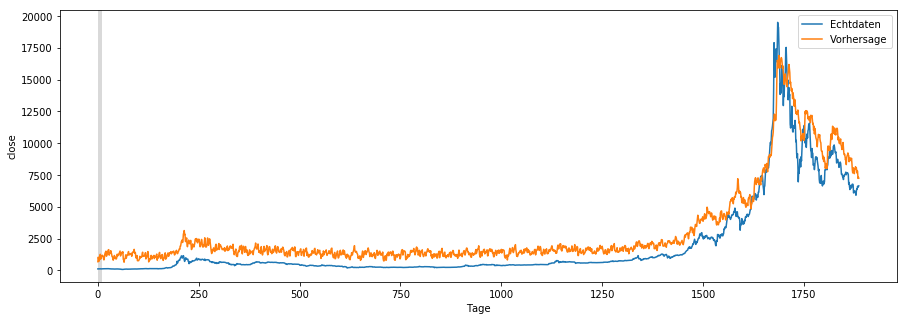

In [65]:
import matplotlib.pyplot as plt

plot_comparison(start_idx=1, length=1900, train=True)

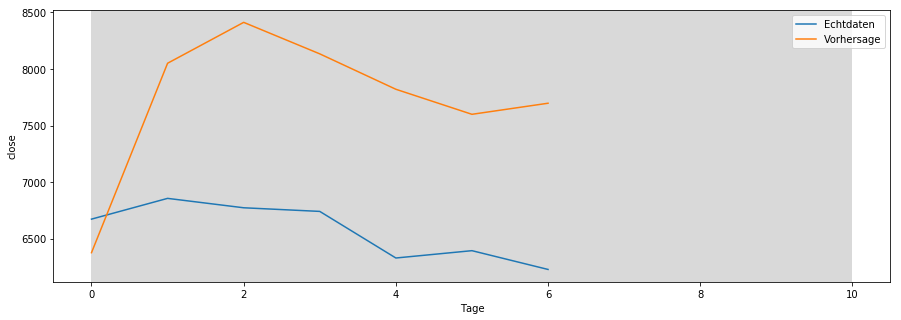

In [66]:
plot_comparison(start_idx=0, length=8, train=False)